In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import graphviz

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('iris 5.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Create features matrix
x = df.loc[:, features].values

In [10]:
y=df.Species

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [12]:
# Creating the Decision Tree classifier with specified parameters
clf = DecisionTreeClassifier(
    max_depth=2,
    random_state=0
)

In [14]:
# Fit the classifier to the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [16]:
# Make predictions using the classifier
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [17]:
from sklearn import metrics
import seaborn as sns

In [18]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [19]:
print(metrics.classification_report(y_test,clf.predict(x_test)))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



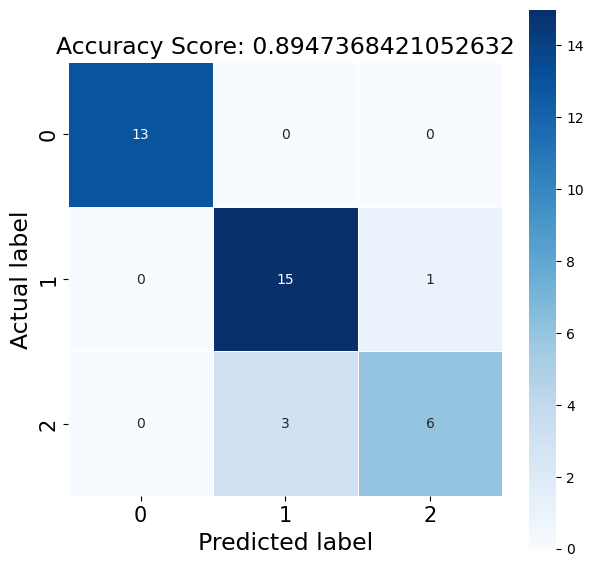

In [21]:
# Plotting the confusion matrix

cm = metrics.confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title('Accuracy Score: {}'.format(score), size=17)
plt.tick_params(labelsize=15)
plt.show()

In [22]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average accuracy for each value of max_depth:
accuracy = [DecisionTreeClassifier(max_depth=depth, random_state=0).fit(x_train, y_train).score(x_test, y_test) for depth in max_depth_range]

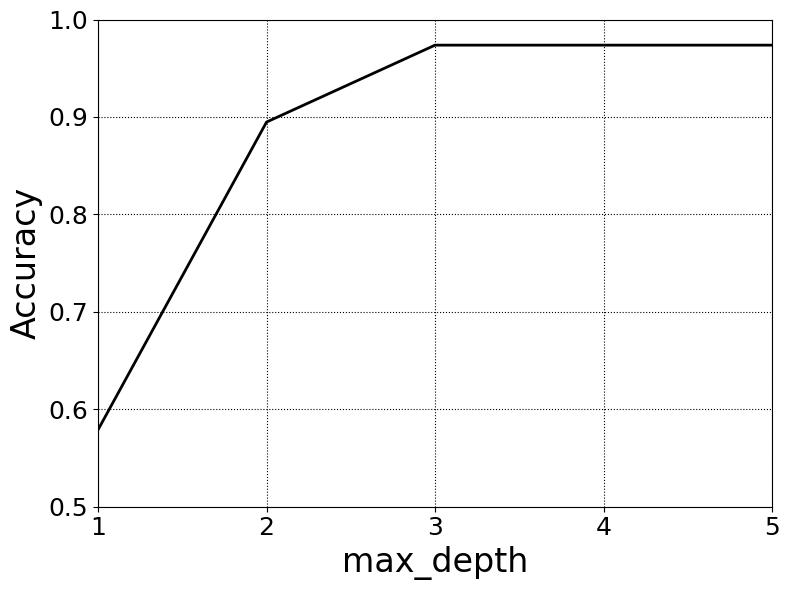

In [25]:
# Plotting accuracy score depth wise
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(max_depth_range, accuracy, lw=2, color='k')

ax.set_xlim([1, 5])
ax.set_ylim([0.50, 1.00])
ax.grid(True, axis='both', zorder=0, linestyle=':', color='k')

ax.tick_params(labelsize=18)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel('max_depth', fontsize=24)
ax.set_ylabel('Accuracy', fontsize=24)
fig.tight_layout()

# Uncomment the following line if you want to save the figure
# fig.savefig('images/max_depth_vs_accuracy.png', dpi=300)

plt.show()

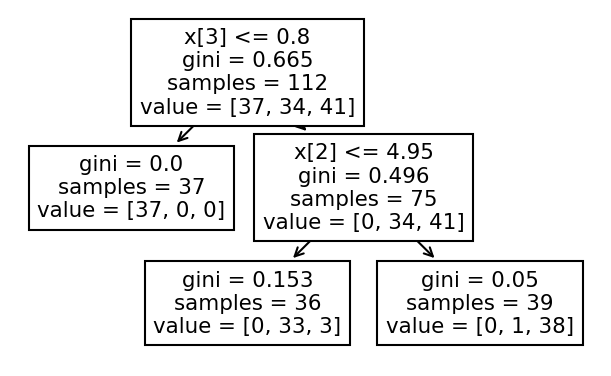

In [31]:
# Create a figure and axis for plotting
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3), dpi=150)

# Plot the Decision Tree
plot_tree(clf, ax=axes)

# Show the plot
plt.show()

In [32]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

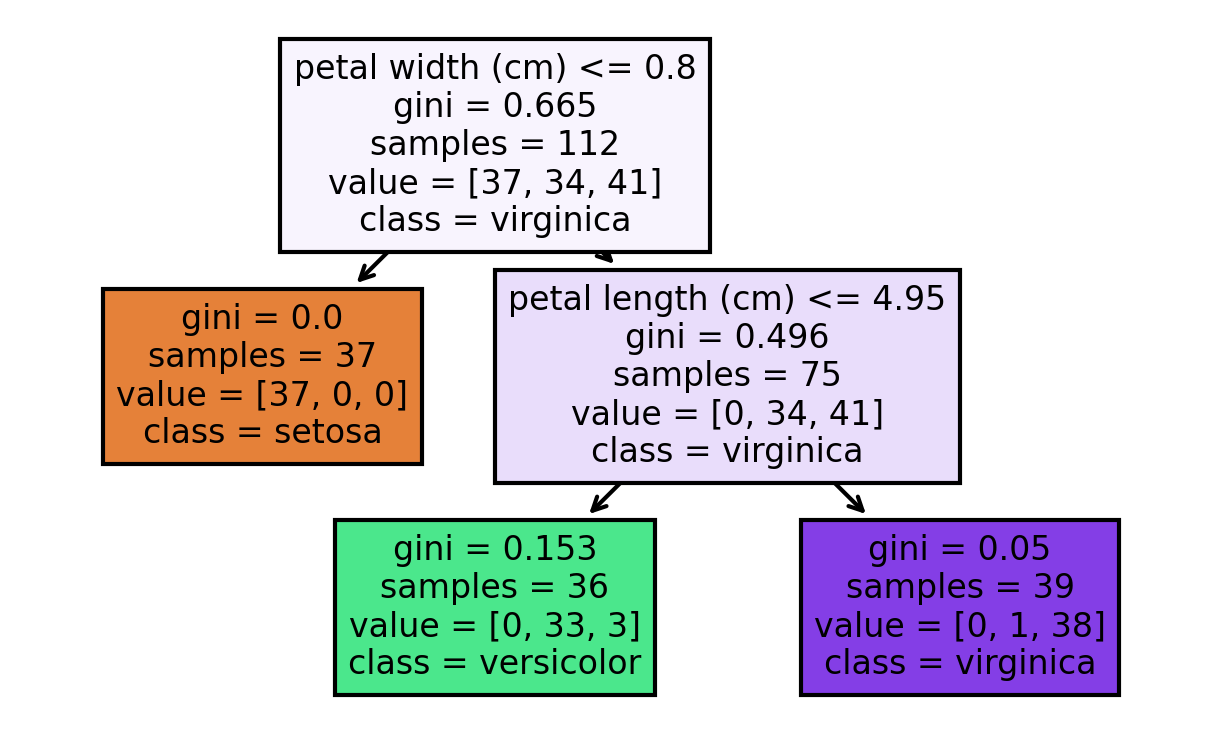

In [34]:
# Creating the figure and axes
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

# Plotting the Decision Tree
plot_tree(
    decision_tree=clf,
    feature_names=fn,
    class_names=cn,
    filled=True,
    ax=ax
)

# Displaying the plot
plt.show()